In [1]:
import pandas as pd
import numpy as np

import time
import datetime
from datetime import date
from datetime import datetime

import os, os.path
from os import listdir
from os.path import isfile, join

import re
# from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import sys

# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as npc

In [2]:
meta_dir = "/Users/hn/Documents/01_research_data/NASA/parameters/"
meta = pd.read_csv(meta_dir+"evaluation_set.csv")
meta_moreThan10Acr=meta[meta.ExctAcr>10]
print (meta.shape)
print (meta_moreThan10Acr.shape)
meta.head(2)

(6340, 8)
(3539, 8)


,ID,CropTyp,Irrigtn,DataSrc,Acres,ExctAcr,LstSrvD,county
0,100010_WSDA_SF_2017,alfalfa hay,center pivot,wsda,34,34.310305,2017/09/12,Grant
1,100204_WSDA_SF_2017,alfalfa hay,center pivot,wsda,62,61.826535,2017/08/09,Grant


In [35]:
VI_idx="EVI"
proper_year=2017

In [42]:
landsat_raw_dir = "/Users/hn/Documents/01_research_data/NASA/VI_TS/data_for_train_individual_counties/"
landsat_fNames = [x for x in os.listdir(landsat_raw_dir) if x.endswith(".csv")]

landsat_fNames = ['L7_T1C2L2_Scaled_Grant2017_2016-01-01_2018-10-14.csv',
                  'L8_T1C2L2_Scaled_Grant2017_2016-01-01_2018-10-14.csv']

landsat_raw = pd.DataFrame()
for fName in landsat_fNames:
    curr = pd.read_csv(landsat_raw_dir+fName)
    landsat_raw=pd.concat([landsat_raw, curr])

landsat_raw.reset_index(drop=True, inplace=True)

landsat_raw_evi = landsat_raw.copy()
landsat_raw_ndvi = landsat_raw.copy()

landsat_raw_evi = landsat_raw_evi.drop(columns=['NDVI'])
landsat_raw_ndvi = landsat_raw_ndvi.drop(columns=['EVI'])

landsat_raw_evi = landsat_raw_evi[landsat_raw_evi["EVI"].notna()]
landsat_raw_ndvi = landsat_raw_ndvi[landsat_raw_ndvi["NDVI"].notna()]

landsat_raw_evi = nc.add_human_start_time_by_system_start_time(landsat_raw_evi)
landsat_raw_ndvi = nc.add_human_start_time_by_system_start_time(landsat_raw_ndvi)

landsat_raw_evi = landsat_raw_evi[landsat_raw_evi.human_system_start_time.dt.year==proper_year]
landsat_raw_ndvi = landsat_raw_ndvi[landsat_raw_ndvi.human_system_start_time.dt.year==proper_year]

landsat_raw_evi.sort_values(by=["ID", 'human_system_start_time'], inplace=True)
landsat_raw_ndvi.sort_values(by=["ID", 'human_system_start_time'], inplace=True)

landsat_raw_evi.reset_index(drop=True, inplace=True)
landsat_raw_ndvi.reset_index(drop=True, inplace=True)

In [ ]:
# landsat_SG_dir = "/Users/hn/Documents/01_research_data/NASA/VI_TS/05_SG_TS/"
# file_names = ["SG_Grant2017_" + VI_idx + "_JFD.csv"]

# landsat_SG=pd.DataFrame()

# for file in file_names:
#     curr_file=pd.read_csv(landsat_SG_dir + file)
#     curr_file['human_system_start_time'] = pd.to_datetime(curr_file['human_system_start_time'])
    
#     # These data are for 3 years. The middle one is the correct one
#     all_years = sorted(curr_file.human_system_start_time.dt.year.unique())
#     if len(all_years)==3 or len(all_years)==2:
#         proper_year = all_years[1]
#     elif len(all_years)==1:
#         proper_year = all_years[0]

#     curr_file = curr_file[curr_file.human_system_start_time.dt.year==proper_year]
#     landsat_SG=pd.concat([landsat_SG, curr_file])

# landsat_SG.reset_index(drop=True, inplace=True)
# landsat_SG.head(2)


In [41]:
sentinel_raw_dir = "/Users/hn/Documents/01_research_data/remote_sensing/"+\
                    "01_NDVI_TS_00_Eastern_WA_withYear_70Cloud/2Years/"

sentinel_fNames=["clean_Eastern_WA_2017_70cloud_selectors.csv"]

sentinel_raw=pd.DataFrame()
for fName in sentinel_fNames:
    curr = pd.read_csv(sentinel_raw_dir+fName)
    sentinel_raw=pd.concat([sentinel_raw, curr])

sentinel_raw_evi = sentinel_raw.copy()
sentinel_raw_ndvi = sentinel_raw.copy()

sentinel_raw_evi = sentinel_raw_evi.drop(columns=['NDVI'])
sentinel_raw_ndvi = sentinel_raw_ndvi.drop(columns=['EVI'])

sentinel_raw_evi = sentinel_raw_evi[sentinel_raw_evi["EVI"].notna()]
sentinel_raw_ndvi = sentinel_raw_ndvi[sentinel_raw_ndvi["NDVI"].notna()]

sentinel_raw_evi = nc.add_human_start_time_by_system_start_time(sentinel_raw_evi)
sentinel_raw_ndvi = nc.add_human_start_time_by_system_start_time(sentinel_raw_ndvi)

sentinel_raw_evi = sentinel_raw_evi[sentinel_raw_evi.human_system_start_time.dt.year==proper_year]
sentinel_raw_ndvi = sentinel_raw_ndvi[sentinel_raw_ndvi.human_system_start_time.dt.year==proper_year]


sentinel_raw_evi.sort_values(by=["ID", 'human_system_start_time'], inplace=True)
sentinel_raw_ndvi.sort_values(by=["ID", 'human_system_start_time'], inplace=True)

sentinel_raw_evi.reset_index(drop=True, inplace=True)
sentinel_raw_ndvi.reset_index(drop=True, inplace=True)

In [46]:
field_IDs=["102373_WSDA_SF_2017"]

In [47]:
a_field_sentinel_raw_NDVI=sentinel_raw_ndvi[sentinel_raw_ndvi.ID.isin(field_IDs)].copy()
a_field_sentinel_raw_EVI=sentinel_raw_evi[sentinel_raw_evi.ID.isin(field_IDs)].copy()

a_field_landsat_raw_NDVI=landsat_raw_ndvi[landsat_raw_ndvi.ID.isin(field_IDs)].copy()
a_field_landsat_raw_EVI=landsat_raw_evi[landsat_raw_evi.ID.isin(field_IDs)].copy()

In [58]:
a_field_landsat_raw_EVI.sort_values(by=['human_system_start_time'], inplace=True)
a_field_landsat_raw_NDVI.sort_values(by=['human_system_start_time'], inplace=True)
a_field_sentinel_raw_EVI.sort_values(by=['human_system_start_time'], inplace=True)
a_field_sentinel_raw_NDVI.sort_values(by=['human_system_start_time'], inplace=True)

In [48]:
a_field_landsat_raw_EVI.head(2)

,ID,EVI,system_start_time,human_system_start_time
126528,102373_WSDA_SF_2017,0.019941,1.483556e+12,2017-01-04
126529,102373_WSDA_SF_2017,0.037313,1.483642e+12,2017-01-05


In [49]:
print(sorted(a_field_sentinel_raw_EVI.human_system_start_time.dt.year.unique()))
print(sorted(a_field_sentinel_raw_NDVI.human_system_start_time.dt.year.unique()))

print(sorted(a_field_sentinel_raw_EVI.human_system_start_time.dt.year.unique()))
print(sorted(a_field_sentinel_raw_NDVI.human_system_start_time.dt.year.unique()))

[2017]
[2017]
[2017]
[2017]


In [110]:
size = 20
title_FontSize = 10
legend_FontSize = 8
tick_FontSize = 12
label_FontSize = 14

params = {'legend.fontsize': 15, # medium, large
          # 'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size, #  * 0.75
          'ytick.labelsize': size, #  * 0.75
          'axes.titlepad': 10}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)
# pylab.rcParams.update(params)
# plt.rc('text', usetex=True)

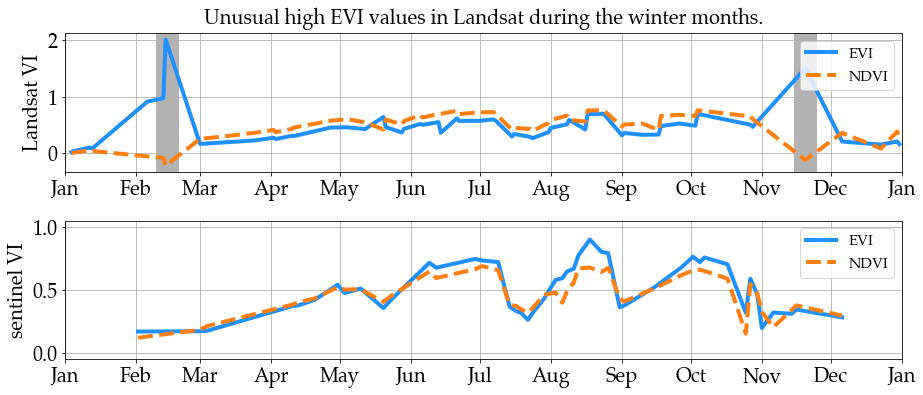

In [155]:
titlee="Unusual high EVI values in Landsat during the winter months."
fig, axs = plt.subplots(2, 1, figsize=(15, 6), sharex=False, # sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

(ax1, ax2) = axs; ax1.grid(True); ax2.grid(True); 

# ax1.scatter(a_field_landsat_raw_EVI['human_system_start_time'], 
#             a_field_landsat_raw_EVI["EVI"], 
#             s=20, c="r", label="EVI")

# ax1.scatter(a_field_landsat_raw_NDVI['human_system_start_time'], 
#             a_field_landsat_raw_NDVI["NDVI"], 
#              s=20, c="dodgerblue", label="NDVI")

ax1.plot(a_field_landsat_raw_EVI['human_system_start_time'], 
         a_field_landsat_raw_EVI["EVI"], 
         linewidth=4, color="dodgerblue", label="EVI") 

ax1.plot(a_field_landsat_raw_NDVI['human_system_start_time'], 
         a_field_landsat_raw_NDVI["NDVI"], 
         linewidth=4, color="#ff7f0e", linestyle="dashed", label="NDVI") 

ax1.set_ylabel("Landsat VI") # , labelpad=20); # fontsize = label_FontSize,
ax1.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax1.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax1.legend(loc="upper right");
ax1.set_xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
from matplotlib.dates import MonthLocator, DateFormatter
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter('%b'))

from datetime import datetime
ax1.axvspan(datetime(proper_year, 2, 10), 
            datetime(proper_year, 2, 20), facecolor='.01', alpha=0.3)

ax1.axvspan(datetime(proper_year, 11, 15), 
            datetime(proper_year, 11, 25), facecolor='.01', alpha=0.3)

ax1.set_title(titlee)
####################################

ax2.plot(a_field_sentinel_raw_EVI['human_system_start_time'], 
         a_field_sentinel_raw_EVI["EVI"], 
         linewidth=4, color="dodgerblue", label="EVI") 

ax2.plot(a_field_sentinel_raw_NDVI['human_system_start_time'], 
         a_field_sentinel_raw_NDVI["NDVI"], 
         linewidth=4, color="#ff7f0e", linestyle="dashed", label="NDVI") 

ax2.set_ylim([-0.05, 1.05])
ax2.set_xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
ax2.set_ylabel("sentinel VI") # , labelpad=20); # fontsize = label_FontSize,
ax2.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax2.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax2.legend(loc="upper right");
from matplotlib.dates import MonthLocator, DateFormatter

ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(DateFormatter('%b'))


# plt.yticks(np.arange(0, 2, 1));
# ax.xaxis.set_major_locator(mdates.YearLocator(1))
# ax1.set_ylim(-0.1, 2);

plot_dir = "/Users/hn/Documents/01_research_data/NASA/for_paper/plots/JFD_problem/"
os.makedirs(plot_dir, exist_ok=True)

file_name = plot_dir + "Sentinel_Landsat_EVI_JFDProblem.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


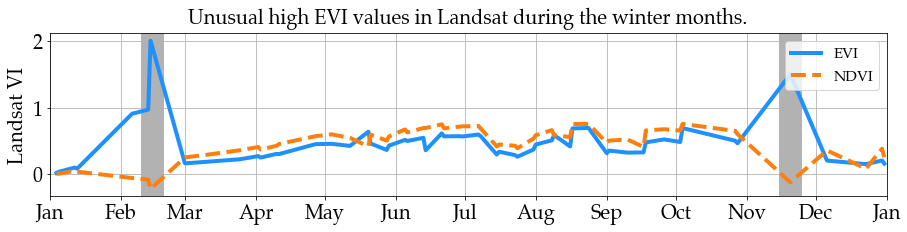

In [153]:
titlee="Unusual high EVI values in Landsat during the winter months."
fig, ax1 = plt.subplots(1, 1, figsize=(15, 3), sharex=False, sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

ax1.grid(True);
ax1.plot(a_field_landsat_raw_EVI['human_system_start_time'], 
         a_field_landsat_raw_EVI["EVI"], 
         linewidth=4, color="dodgerblue", label="EVI") 

ax1.plot(a_field_landsat_raw_NDVI['human_system_start_time'], 
         a_field_landsat_raw_NDVI["NDVI"], 
         linewidth=4, color="#ff7f0e", linestyle="dashed", label="NDVI") 

ax1.set_ylabel("Landsat VI") # , labelpad=20); # fontsize = label_FontSize,
ax1.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax1.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax1.legend(loc="upper right");
ax1.set_xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
from matplotlib.dates import MonthLocator, DateFormatter
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter('%b'))


ax1.axvspan(datetime(proper_year, 2, 10), 
            datetime(proper_year, 2, 20), facecolor='.01', alpha=0.3)
ax1.axvspan(datetime(proper_year, 11, 15), 
            datetime(proper_year, 11, 25), facecolor='.01', alpha=0.3)

ax1.set_title(titlee)

plot_dir = "/Users/hn/Documents/01_research_data/NASA/for_paper/plots/JFD_problem/"
os.makedirs(plot_dir, exist_ok=True)

file_name = plot_dir + "Landsat_EVI_JFDProblem.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


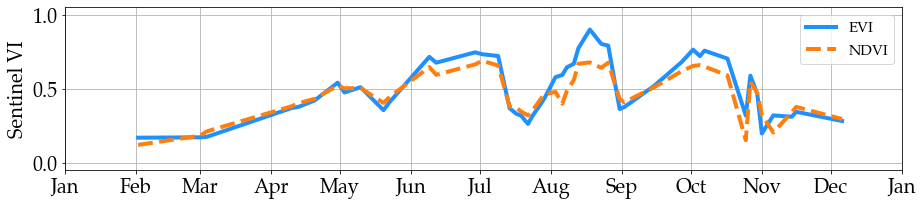

In [152]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 3), sharex=False, sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

ax1.grid(True);

ax1.plot(a_field_sentinel_raw_EVI['human_system_start_time'], 
         a_field_sentinel_raw_EVI["EVI"], 
         linewidth=4, color="dodgerblue", label="EVI") 

ax1.plot(a_field_sentinel_raw_NDVI['human_system_start_time'], 
         a_field_sentinel_raw_NDVI["NDVI"], 
         linewidth=4, color="#ff7f0e", linestyle="dashed", label="NDVI") 

ax1.set_ylim([-0.05, 1.05])
ax1.set_ylabel("Sentinel VI") # , labelpad=20); # fontsize = label_FontSize,
ax1.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax1.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax1.legend(loc="upper right");
ax1.set_xlim([datetime(2017, 1, 1), datetime(2018, 1, 1)])
from matplotlib.dates import MonthLocator, DateFormatter
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter('%b'))

plot_dir = "/Users/hn/Documents/01_research_data/NASA/for_paper/plots/JFD_problem/"
os.makedirs(plot_dir, exist_ok=True)

file_name = plot_dir + "Sentinel_EVI_JFDProblem.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);
